The following notebook uses both KMeans and Hierarchal clustering to answer the question: how do the average test scores of clusters compare and are the relative proportions of charter schools in such clusters different? First, the clustering is done into two groups, a decision supported by the dendrogram of data. Then, the same clustering techniques are used but with three and four clusters. 

In [297]:
# importing the necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [298]:
# obtains data, retaining only relevant columns
df_combined = pd.read_csv('combined_data/combined.csv')
df_combined = df_combined.dropna()
df_clustering = df_combined[['Total Students All Grades (Excludes AE)', 'Free and Reduced Lunch Students Percentage',  
                             'Female Students Percentage', 'American Indian/Alaska Native Students Percentage', 
                             'Asian or Asian/Pacific Islander Students Percentage', 'Hispanic Students Percentage', 
                             'Black or African American Students Percentage',
                             'Nat. Hawaiian or Other Pacific Isl. Students Percentage', 'Two or More Races Students Percentage', 
                             'Apache County', 'Cochise County', 'Coconino County', 'Gila County', 'Graham County', 'Greenlee County', 
                             'La Paz County', 'Mohave County', 'Navajo County', 'Pima County', 'Pinal County', 
                             'Santa Cruz County', 'Yavapai County', 'Yuma County']]
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(df_scaled, columns=df_clustering.columns, index=df_clustering.index)
df_scaled.head()

,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Nat. Hawaiian or Other Pacific Isl. Students Percentage,Two or More Races Students Percentage,Apache County,...,Graham County,Greenlee County,La Paz County,Mohave County,Navajo County,Pima County,Pinal County,Santa Cruz County,Yavapai County,Yuma County
0,0.044070,0.466984,0.521236,0.077220,0.043217,0.115830,0.032346,0.046332,0.108108,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.042028,0.342574,0.489879,0.093117,0.035246,0.141700,0.033918,0.036437,0.113360,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.047814,0.310342,0.480427,0.096085,0.017704,0.174377,0.029814,0.010676,0.170819,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.051387,0.310342,0.546358,0.069536,0.016473,0.205298,0.022192,0.009934,0.172185,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.037264,0.310342,0.552511,0.095890,0.000000,0.246575,0.015302,0.000000,0.127854,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


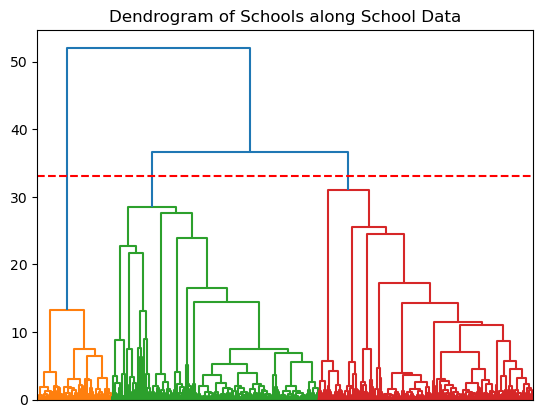

In [299]:
# plots a dendrogram to deterimine number of clusters
dendrogram = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.title('Dendrogram of Schools along School Data')
plt.axhline(y=33, color='r', linestyle='--')
plt.tick_params(axis='x', labelbottom=False)
plt.show()

In [300]:
# Hierarchal clustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
df_scaled['HC labels'] = hc.fit_predict(df_scaled)

# KMeans clustering
km = KMeans(n_clusters=2)
df_scaled['KM labels'] = km.fit_predict(df_scaled)

df_combined['HC labels'] = df_scaled['HC labels']
df_combined['KM labels'] = df_scaled['KM labels']

km_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'KM labels',
             'Maricopa County']].groupby('KM labels').agg('mean')
km_sizes = df_combined.groupby('KM labels').size()
km_output = pd.concat([km_sizes, km_means], axis=1)
km_output.columns.values[0] = 'Cluster Size'

hc_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'HC labels',
             'Maricopa County']].groupby('HC labels').agg('mean')
hc_sizes = df_combined.groupby('HC labels').size()
hc_output = pd.concat([hc_sizes, hc_means], axis=1)
hc_output.columns.values[0] = 'Cluster Size'

display(km_output)
display(hc_output)

,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
KM labels,,,,,,,,,,,
0,1562,36.029576,0.275288,515.361249,0.534443,0.483069,0.028409,0.019004,0.553269,0.043788,0.000000
1,8775,37.550749,0.250940,606.803692,0.516033,0.487601,0.073825,0.024499,0.432507,0.050644,0.639202


,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
HC labels,,,,,,,,,,,
0,8775,37.550749,0.250940,606.803692,0.516033,0.487601,0.073825,0.024499,0.432507,0.050644,0.639202
1,1562,36.029576,0.275288,515.361249,0.534443,0.483069,0.028409,0.019004,0.553269,0.043788,0.000000


In [301]:
# Hierarchal clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df_scaled['HC labels'] = hc.fit_predict(df_scaled)

# KMeans clustering
km = KMeans(n_clusters=3)
df_scaled['KM labels'] = km.fit_predict(df_scaled)

df_combined['HC labels'] = df_scaled['HC labels']
df_combined['KM labels'] = df_scaled['KM labels']

km_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'KM labels',
             'Maricopa County']].groupby('KM labels').agg('mean')
km_sizes = df_combined.groupby('KM labels').size()
km_output = pd.concat([km_sizes, km_means], axis=1)
km_output.columns.values[0] = 'Cluster Size'

hc_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'HC labels',
             'Maricopa County']].groupby('HC labels').agg('mean')
hc_sizes = df_combined.groupby('HC labels').size()
hc_output = pd.concat([hc_sizes, hc_means], axis=1)
hc_output.columns.values[0] = 'Cluster Size'

display(km_output)
display(hc_output)

,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
KM labels,,,,,,,,,,,
0,1562,36.029576,0.275288,515.361249,0.534443,0.483069,0.028409,0.019004,0.553269,0.043788,0.000000
1,4473,29.647313,0.232059,620.294985,0.656957,0.482661,0.028264,0.014279,0.639148,0.072579,0.684775
2,4302,45.768339,0.270572,592.776133,0.369508,0.492736,0.121197,0.035125,0.217651,0.027837,0.591818


,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
HC labels,,,,,,,,,,,
0,4473,29.647313,0.232059,620.294985,0.656957,0.482661,0.028264,0.014279,0.639148,0.072579,0.684775
1,1562,36.029576,0.275288,515.361249,0.534443,0.483069,0.028409,0.019004,0.553269,0.043788,0.000000
2,4302,45.768339,0.270572,592.776133,0.369508,0.492736,0.121197,0.035125,0.217651,0.027837,0.591818


In [302]:
# Hierarchal clustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df_scaled['HC labels'] = hc.fit_predict(df_scaled)

# KMeans clustering
km = KMeans(n_clusters=4)
df_scaled['KM labels'] = km.fit_predict(df_scaled)

df_combined['HC labels'] = df_scaled['HC labels']
df_combined['KM labels'] = df_scaled['KM labels']

km_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'KM labels',
             'Maricopa County']].groupby('KM labels').agg('mean')
km_sizes = df_combined.groupby('KM labels').size()
km_output = pd.concat([km_sizes, km_means], axis=1)
km_output.columns.values[0] = 'Cluster Size'

hc_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'HC labels',
             'Maricopa County']].groupby('HC labels').agg('mean')
hc_sizes = df_combined.groupby('HC labels').size()
hc_output = pd.concat([hc_sizes, hc_means], axis=1)
hc_output.columns.values[0] = 'Cluster Size'

display(km_output)
display(hc_output)

,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
KM labels,,,,,,,,,,,
0,512,29.461144,0.214844,586.007812,0.544801,0.477415,0.042896,0.010098,0.482424,0.057020,0.000000
1,3961,29.671377,0.234284,624.726955,0.671454,0.483340,0.026372,0.014820,0.659407,0.074590,0.773290
2,4302,45.768339,0.270572,592.776133,0.369508,0.492736,0.121197,0.035125,0.217651,0.027837,0.591818
3,1562,36.029576,0.275288,515.361249,0.534443,0.483069,0.028409,0.019004,0.553269,0.043788,0.000000


,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
HC labels,,,,,,,,,,,
0,4302,45.768339,0.270572,592.776133,0.369508,0.492736,0.121197,0.035125,0.217651,0.027837,0.591818
1,3961,29.671377,0.234284,624.726955,0.671454,0.483340,0.026372,0.014820,0.659407,0.074590,0.773290
2,1562,36.029576,0.275288,515.361249,0.534443,0.483069,0.028409,0.019004,0.553269,0.043788,0.000000
3,512,29.461144,0.214844,586.007812,0.544801,0.477415,0.042896,0.010098,0.482424,0.057020,0.000000


In [303]:
# obtains data, retaining only relevant columns
df_combined = pd.read_csv('combined_data/combined.csv')
df_combined = df_combined.dropna()
df_clustering = df_combined[['Total Students All Grades (Excludes AE)', 'Free and Reduced Lunch Students Percentage',  
                             'Female Students Percentage', 'American Indian/Alaska Native Students Percentage', 
                             'Asian or Asian/Pacific Islander Students Percentage', 'Hispanic Students Percentage', 
                             'Black or African American Students Percentage',
                             'Nat. Hawaiian or Other Pacific Isl. Students Percentage', 'Two or More Races Students Percentage', 
                             'Apache County', 'Cochise County', 'Coconino County', 'Gila County', 'Graham County', 'Greenlee County', 
                             'La Paz County', 'Mohave County', 'Navajo County', 'Pima County', 'Pinal County', 
                             'Santa Cruz County', 'Yavapai County', 'Yuma County', 'Average Percent Passing']]
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(df_scaled, columns=df_clustering.columns, index=df_clustering.index)

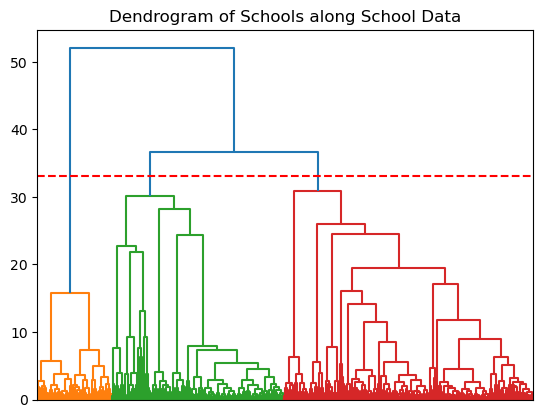

In [304]:
# plots a dendrogram to deterimine number of clusters
dendrogram = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.title('Dendrogram of Schools along School Data')
plt.axhline(y=33, color='r', linestyle='--')
plt.tick_params(axis='x', labelbottom=False)
plt.show()

In [305]:
# Hierarchal clustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
df_scaled['HC labels'] = hc.fit_predict(df_scaled)

# KMeans clustering
km = KMeans(n_clusters=2)
df_scaled['KM labels'] = km.fit_predict(df_scaled)

df_combined['HC labels'] = df_scaled['HC labels']
df_combined['KM labels'] = df_scaled['KM labels']

km_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'KM labels',
             'Maricopa County']].groupby('KM labels').agg('mean')
km_sizes = df_combined.groupby('KM labels').size()
km_output = pd.concat([km_sizes, km_means], axis=1)
km_output.columns.values[0] = 'Cluster Size'

hc_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'HC labels',
             'Maricopa County']].groupby('HC labels').agg('mean')
hc_sizes = df_combined.groupby('HC labels').size()
hc_output = pd.concat([hc_sizes, hc_means], axis=1)
hc_output.columns.values[0] = 'Cluster Size'

display(km_output)
display(hc_output)

,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
KM labels,,,,,,,,,,,
0,1562,36.029576,0.275288,515.361249,0.534443,0.483069,0.028409,0.019004,0.553269,0.043788,0.000000
1,8775,37.550749,0.250940,606.803692,0.516033,0.487601,0.073825,0.024499,0.432507,0.050644,0.639202


,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
HC labels,,,,,,,,,,,
0,8775,37.550749,0.250940,606.803692,0.516033,0.487601,0.073825,0.024499,0.432507,0.050644,0.639202
1,1562,36.029576,0.275288,515.361249,0.534443,0.483069,0.028409,0.019004,0.553269,0.043788,0.000000


In [306]:
# Hierarchal clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df_scaled['HC labels'] = hc.fit_predict(df_scaled)

# KMeans clustering
km = KMeans(n_clusters=3)
df_scaled['KM labels'] = km.fit_predict(df_scaled)

df_combined['HC labels'] = df_scaled['HC labels']
df_combined['KM labels'] = df_scaled['KM labels']

km_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'KM labels',
             'Maricopa County']].groupby('KM labels').agg('mean')
km_sizes = df_combined.groupby('KM labels').size()
km_output = pd.concat([km_sizes, km_means], axis=1)
km_output.columns.values[0] = 'Cluster Size'

hc_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'HC labels',
             'Maricopa County']].groupby('HC labels').agg('mean')
hc_sizes = df_combined.groupby('HC labels').size()
hc_output = pd.concat([hc_sizes, hc_means], axis=1)
hc_output.columns.values[0] = 'Cluster Size'

display(km_output)
display(hc_output)

,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
KM labels,,,,,,,,,,,
0,3579,48.159297,0.253982,630.232806,0.360057,0.492553,0.134202,0.039834,0.196374,0.026005,0.572506
1,5196,30.243591,0.248845,590.665740,0.623469,0.484190,0.032237,0.013936,0.595154,0.067615,0.685142
2,1562,36.029576,0.275288,515.361249,0.534443,0.483069,0.028409,0.019004,0.553269,0.043788,0.000000


,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
HC labels,,,,,,,,,,,
0,5196,30.243591,0.248845,590.665740,0.623469,0.484190,0.032237,0.013936,0.595154,0.067615,0.685142
1,1562,36.029576,0.275288,515.361249,0.534443,0.483069,0.028409,0.019004,0.553269,0.043788,0.000000
2,3579,48.159297,0.253982,630.232806,0.360057,0.492553,0.134202,0.039834,0.196374,0.026005,0.572506


In [307]:
# Hierarchal clustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df_scaled['HC labels'] = hc.fit_predict(df_scaled)

# KMeans clustering
km = KMeans(n_clusters=4)
df_scaled['KM labels'] = km.fit_predict(df_scaled)

df_combined['HC labels'] = df_scaled['HC labels']
df_combined['KM labels'] = df_scaled['KM labels']

km_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'KM labels',
             'Maricopa County']].groupby('KM labels').agg('mean')
km_sizes = df_combined.groupby('KM labels').size()
km_output = pd.concat([km_sizes, km_means], axis=1)
km_output.columns.values[0] = 'Cluster Size'

hc_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'HC labels',
             'Maricopa County']].groupby('HC labels').agg('mean')
hc_sizes = df_combined.groupby('HC labels').size()
hc_output = pd.concat([hc_sizes, hc_means], axis=1)
hc_output.columns.values[0] = 'Cluster Size'

display(km_output)
display(hc_output)

,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
KM labels,,,,,,,,,,,
0,4684,30.329119,0.252562,591.174890,0.632068,0.484930,0.031072,0.014356,0.607477,0.068773,0.760034
1,3579,48.159297,0.253982,630.232806,0.360057,0.492553,0.134202,0.039834,0.196374,0.026005,0.572506
2,1562,36.029576,0.275288,515.361249,0.534443,0.483069,0.028409,0.019004,0.553269,0.043788,0.000000
3,512,29.461144,0.214844,586.007812,0.544801,0.477415,0.042896,0.010098,0.482424,0.057020,0.000000


,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
HC labels,,,,,,,,,,,
0,3579,48.159297,0.253982,630.232806,0.360057,0.492553,0.134202,0.039834,0.196374,0.026005,0.572506
1,4684,30.329119,0.252562,591.174890,0.632068,0.484930,0.031072,0.014356,0.607477,0.068773,0.760034
2,1562,36.029576,0.275288,515.361249,0.534443,0.483069,0.028409,0.019004,0.553269,0.043788,0.000000
3,512,29.461144,0.214844,586.007812,0.544801,0.477415,0.042896,0.010098,0.482424,0.057020,0.000000


In [308]:
# obtains data, retaining only relevant columns
df_combined = pd.read_csv('combined_data/combined.csv')
df_combined = df_combined.dropna()
df_clustering = df_combined[['Total Students All Grades (Excludes AE)', 'Free and Reduced Lunch Students Percentage',  
                             'Female Students Percentage', 'American Indian/Alaska Native Students Percentage', 
                             'Asian or Asian/Pacific Islander Students Percentage', 'Hispanic Students Percentage', 
                             'Black or African American Students Percentage',
                             'Nat. Hawaiian or Other Pacific Isl. Students Percentage', 'Two or More Races Students Percentage', 
                             'Apache County', 'Cochise County', 'Coconino County', 'Gila County', 'Graham County', 'Greenlee County', 
                             'La Paz County', 'Mohave County', 'Navajo County', 'Pima County', 'Pinal County', 
                             'Santa Cruz County', 'Yavapai County', 'Yuma County', 'Average Percent Passing', 'Charter School Dummy']]
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(df_scaled, columns=df_clustering.columns, index=df_clustering.index)

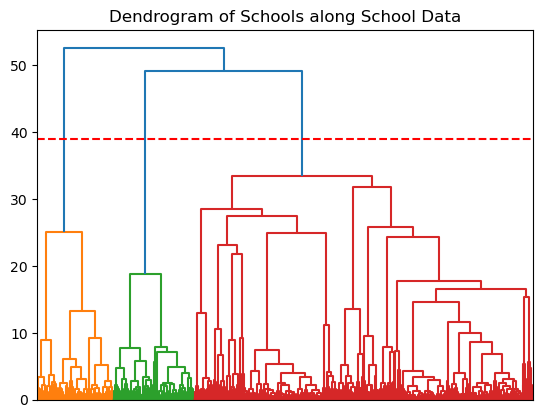

In [310]:
# plots a dendrogram to deterimine number of clusters
dendrogram = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.title('Dendrogram of Schools along School Data')
plt.axhline(y=39, color='r', linestyle='--')
plt.tick_params(axis='x', labelbottom=False)
plt.show()

In [311]:
# Hierarchal clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df_scaled['HC labels'] = hc.fit_predict(df_scaled)

# KMeans clustering
km = KMeans(n_clusters=3)
df_scaled['KM labels'] = km.fit_predict(df_scaled)

df_combined['HC labels'] = df_scaled['HC labels']
df_combined['KM labels'] = df_scaled['KM labels']

km_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'KM labels',
             'Maricopa County']].groupby('KM labels').agg('mean')
km_sizes = df_combined.groupby('KM labels').size()
km_output = pd.concat([km_sizes, km_means], axis=1)
km_output.columns.values[0] = 'Cluster Size'

hc_means = df_combined[['Average Percent Passing', 'Charter School Dummy', 'Total Students All Grades (Excludes AE)', 
             'Free and Reduced Lunch Students Percentage', 'Female Students Percentage', 
             'American Indian/Alaska Native Students Percentage', 'Asian or Asian/Pacific Islander Students Percentage', 
             'Hispanic Students Percentage', 'Black or African American Students Percentage', 'HC labels',
             'Maricopa County']].groupby('HC labels').agg('mean')
hc_sizes = df_combined.groupby('HC labels').size()
hc_output = pd.concat([hc_sizes, hc_means], axis=1)
hc_output.columns.values[0] = 'Cluster Size'

display(km_output)
display(hc_output)

,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
KM labels,,,,,,,,,,,
0,1597,35.547039,0.273012,507.097227,0.536604,0.482832,0.048627,0.018616,0.541870,0.04285,0.000000
1,7057,36.705996,0.072694,655.078600,0.519574,0.484428,0.079288,0.018366,0.437939,0.04501,0.562279
2,1683,41.582405,1.000000,414.125202,0.498752,0.501222,0.032675,0.050699,0.418032,0.07530,0.975045


,Cluster Size,Average Percent Passing,Charter School Dummy,Total Students All Grades (Excludes AE),Free and Reduced Lunch Students Percentage,Female Students Percentage,American Indian/Alaska Native Students Percentage,Asian or Asian/Pacific Islander Students Percentage,Hispanic Students Percentage,Black or African American Students Percentage,Maricopa County
HC labels,,,,,,,,,,,
0,7057,36.705996,0.072694,655.078600,0.519574,0.484428,0.079288,0.018366,0.437939,0.04501,0.562279
1,1597,35.547039,0.273012,507.097227,0.536604,0.482832,0.048627,0.018616,0.541870,0.04285,0.000000
2,1683,41.582405,1.000000,414.125202,0.498752,0.501222,0.032675,0.050699,0.418032,0.07530,0.975045
